In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = os.path.join('data', 'census', 'tl_2019_06_tract.shp')
tracts = gpd.read_file(file_path)

In [4]:
tracts.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."


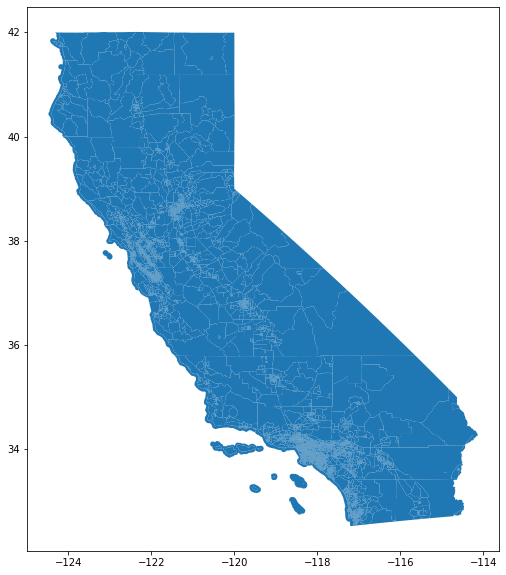

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
tracts.plot(ax=ax)
plt.show()

In [6]:
file_path = os.path.join('data', 'census', 'ACSST5Y2019.S0101_data.csv')
table = pd.read_csv(file_path, skiprows=[1])
table.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",4124,357,254,82,122,55,168,87,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [9]:
filtered = table[['GEO_ID', 'NAME', 'S0101_C01_001E']]
filtered = filtered.rename(columns={'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})
filtered['GEOID'] = filtered['GEOID'].str[-11:]
filtered.head()

,GEOID,NAME,Population
0,06001400100,"Census Tract 4001, Alameda County, California",3120
1,06001400200,"Census Tract 4002, Alameda County, California",2007
2,06001400300,"Census Tract 4003, Alameda County, California",5051
3,06001400400,"Census Tract 4004, Alameda County, California",4007
4,06001400500,"Census Tract 4005, Alameda County, California",4124


In [10]:
gdf = tracts.merge(filtered, on='GEOID')
gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1...","Census Tract 1393.01, Los Angeles County, Cali...",4445
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1...","Census Tract 1393.02, Los Angeles County, Cali...",5000


In [13]:
gdf['density'] = 1e6 * gdf['Population'] / gdf['ALAND']
gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population,intensity,density
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1...","Census Tract 1393.01, Los Angeles County, Cali...",4445,1551.127717,1551.127717
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1...","Census Tract 1393.02, Los Angeles County, Cali...",5000,14780.261847,14780.261847


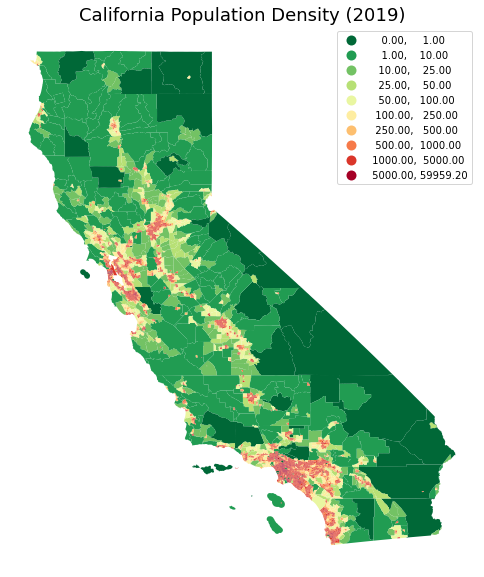

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=dict(bins=[1, 10, 25, 50, 100, 250, 500, 1000, 5000]), legend=True)
ax.set_axis_off()
plt.title('California Population Density (2019)', size=18)
plt.show()